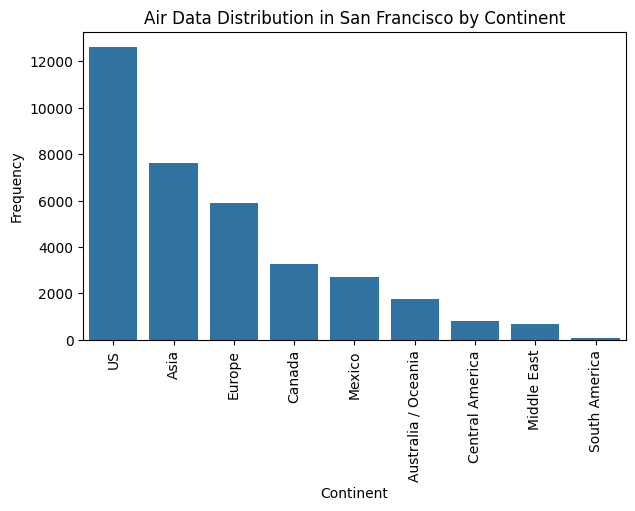

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data/Air_Traffic_Passenger_Statistics_20240408.csv')

continent_counts = data['GEO Region'].value_counts()

# Convert the series to a DataFrame and reset the index
continent_counts_df = pd.DataFrame(continent_counts).reset_index()

# Rename the columns for better readability
continent_counts_df.columns = ['Continent', 'Frequency']

plt.figure(figsize=(7, 4))
sns.barplot(x='Continent', y='Frequency', data=continent_counts_df)
plt.title('Air Data Distribution in San Francisco by Continent')
plt.xlabel('Continent')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

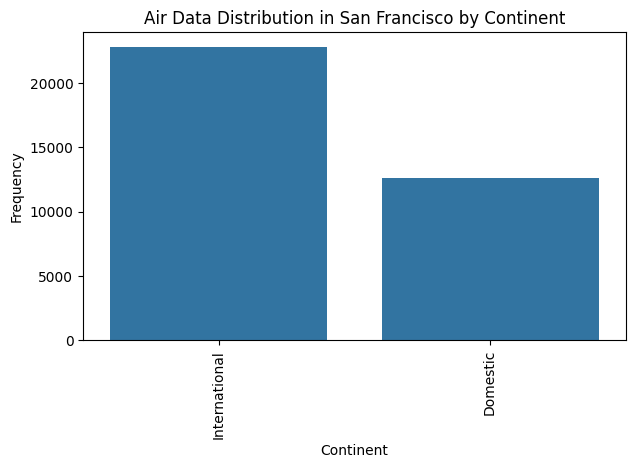

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data/Air_Traffic_Passenger_Statistics_20240408.csv')

continent_counts = data['GEO Summary'].value_counts()

# Convert the series to a DataFrame and reset the index
continent_counts_df = pd.DataFrame(continent_counts).reset_index()

# Rename the columns for better readability
continent_counts_df.columns = ['Continent', 'Frequency']

plt.figure(figsize=(7, 4))
sns.barplot(x='Continent', y='Frequency', data=continent_counts_df)
plt.title('Air Data Distribution in San Francisco by Continent')
plt.xlabel('Continent')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [2]:
print(continent_counts)

             Continent  Frequency
0                   US      12643
1                 Asia       7641
2               Europe       5881
3               Canada       3275
4               Mexico       2689
5  Australia / Oceania       1760
6      Central America        831
7          Middle East        685
8        South America         91


In [4]:
import pandas as pd
import plotly.express as px

# Load data and compute continent counts
data = pd.read_csv('data/Air_Traffic_Passenger_Statistics_20240408.csv')
continent_counts = data['GEO Region'].value_counts().reset_index()
continent_counts.columns = ['Continent', 'Frequency']

# Choropleth map
fig = px.choropleth(locations=continent_counts['Continent'], 
                    locationmode="country names",
                    color=continent_counts['Frequency'],
                    hover_name=continent_counts['Continent'],
                    projection="natural earth",
                    title="Number of Flights by Continent",
                    color_continuous_scale=px.colors.sequential.Plasma)

# Show the figure
fig.show()


In [7]:
import pandas as pd
import plotly.express as px

# Create a mapping dictionary to map each continent to a representative country
continent_mapping = {
    'North America': 'United States',
    'Asia': 'China',
    'Europe': 'France',
    'Canada': 'Canada',
    'Mexico': 'Mexico',
    'Australia / Oceania': 'Australia',
    'Central America': 'Mexico',
    'Middle East': 'Saudi Arabia',  # Example country in the Middle East
    'South America': 'Brazil'
}

# Create a new DataFrame with country names instead of continents
continent_counts['Country'] = continent_counts['Continent'].map(continent_mapping)

# Choropleth map
fig = px.choropleth(locations=continent_counts['Country'], 
                    locationmode="country names",
                    color=continent_counts['Frequency'],
                    hover_name=continent_counts['Continent'],
                    projection="natural earth",
                    title="Number of Flights by Country",
                    color_continuous_scale=px.colors.sequential.Plasma)

# Show the figure
fig.show()


In [9]:
import plotly.express as px

data = pd.read_csv('data/Air_Traffic_Passenger_Statistics_20240408.csv')
continent_counts = data['GEO Region'].value_counts().reset_index()
continent_counts.columns = ['Continent', 'Frequency']

# Choropleth map
fig = px.choropleth(locations=continent_counts['Continent'], 
                    locationmode="country names",
                    color=continent_counts['Frequency'],
                    hover_name=continent_counts['Continent'],
                    projection="natural earth",
                    title="Number of Flights by Continent",
                    color_continuous_scale=px.colors.sequential.Plasma)

# Show the figure
fig.show()


In [11]:
import plotly.graph_objs as go
import pandas as pd

# Sample data
data = {
    'Continent': ['US', 'Asia', 'Europe', 'Canada', 'Mexico', 'Australia / Oceania', 'Central America', 'Middle East', 'South America'],
    'Frequency': [12643, 7641, 5881, 3275, 2689, 1760, 831, 685, 91]
}

df = pd.DataFrame(data)

# Create interactive bar chart
fig = go.Figure(data=[go.Bar(
    x=df['Continent'],
    y=df['Frequency'],
    marker=dict(color='rgb(26, 118, 255)')
)])

fig.update_layout(
    title='Frequency of Regions',
    xaxis=dict(title='Continent'),
    yaxis=dict(title='Frequency'),
    hovermode='closest',
)

fig.show()


In [16]:
import pandas as pd

# Sample data
data = {
    'Continent': ['US', 'Asia', 'Europe', 'Canada', 'Mexico', 'Australia / Oceania', 'Central America', 'Middle East', 'South America'],
    'Frequency': [12643, 7641, 5881, 3275, 2689, 1760, 831, 685, 91]
}

df = pd.DataFrame(data)

# Create a mapping dictionary for continents
continent_mapping = {
    'US': 'North America',
    'Canada': 'North America',
    'Mexico': 'North America',
    'Central America': 'North America',
    'Asia': 'Asia',
    'Europe': 'Europe',
    'Australia / Oceania': 'Oceania',
    'Middle East': 'Asia',
    'South America': 'South America'
}

# Map the 'Continent' column to the new continent names
df['Continent'] = df['Continent'].map(continent_mapping)

# Group by the new 'Continent' column and sum the 'Frequency' column
continent_df = df.groupby('Continent')['Frequency'].sum().reset_index()

print(continent_df)


       Continent  Frequency
0           Asia       8326
1         Europe       5881
2  North America      19438
3        Oceania       1760
4  South America         91


In [19]:
import plotly.graph_objs as go
import pandas as pd

# Sample data
data = {
    'Continent': ['North America', 'Asia', 'Europe', 'North America', 'North America', 'Australia', 'North America', 'Asia', 'South America'],
    'Frequency': [22538, 15626, 5881, 3275, 2689, 1760, 831, 685, 91]
}

df = pd.DataFrame(data)

# Create a dictionary to map continents to their corresponding continent codes
continent_codes = {
    'North America': 'NA',
    'Asia': 'AS',
    'Europe': 'EU',
    'South America': 'SA',
    'Australia': 'AU'
}

# Map data
map_data = dict(
    type='choropleth',
    locations=[continent_codes.get(continent, '') for continent in df['Continent']],
    z=df['Frequency'],
    locationmode='ISO-3',  # ISO-3166 code is used for global mapping
    text=df['Frequency'],
    colorscale='Viridis',
    colorbar=dict(title='Frequency')
)

layout = dict(
    title='Frequency of Continents',
    geo=dict(
        showframe=False,
        projection=dict(type='mercator')
    )
)

fig = go.Figure(data=[map_data], layout=layout)
fig.show()


In [23]:
# import pygal library 
import pygal 
from pygal_maps_world.maps import SupranationalWorld

  
# create a world map 
worldmap =  SupranationalWorld() 
  
# set the title of map 
worldmap.title = 'Continents'
  
# adding the continents 
worldmap.add('Africa', [('africa')]) 
worldmap.add('North america', [('north_america')]) 
worldmap.add('Oceania', [('oceania')]) 
worldmap.add('South america', [('south_america')]) 
worldmap.add('Asia', [('asia')]) 
worldmap.add('Europe', [('europe')]) 
worldmap.add('Antartica', [('antartica')]) 
  
# save into the file 
worldmap.render_to_file('abc.svg') 
  
print("Success") 

Success


In [24]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=["AF", "NA", "OC", "SA", "AS", "EU", "AN"],
    z=[1, 1, 1, 1, 1, 1, 1],
    locationmode='ISO-3',
    colorscale='Viridis',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
))

fig.update_layout(
    title_text='Interactive World Map',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

In [26]:
import plotly.graph_objects as go

continent_df = pd.DataFrame({
    'Continent': ['Asia', 'Europe', 'North America', 'Oceania', 'South America'],
    'Frequency': [8326, 5881, 19438, 1760, 91]
})

# Create a DataFrame with the continent codes
continent_codes = {
    'Continent': ['Asia', 'Europe', 'North America', 'Oceania', 'South America'],
    'Code': ['AS', 'EU', 'NA', 'OC', 'SA']
}
codes_df = pd.DataFrame(continent_codes)

# Merge the two DataFrames on the 'Continent' column
merged_df = pd.merge(continent_df, codes_df, on='Continent')

# Create the interactive world map
fig = go.Figure(data=go.Choropleth(
    locations=merged_df['Code'], # use the continent codes for the locations
    z=merged_df['Frequency'], # use the frequency for the color scale
    text=merged_df['Continent'], # use the continent names for the hover text
    locationmode='ISO-3', # indicate that we're using ISO 3166-1 alpha-2 codes
    colorscale='Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title='Frequency',
))

fig.update_layout(
    title_text='Frequency by Continent',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    )
)

fig.show()

In [30]:
import pandas as pd
import plotly.graph_objects as go
import pycountry_convert as pc
import pycountry

# Define the continent frequencies
continent_freq = {
    'AS': 8326,
    'EU': 5881,
    'NA': 19438,
    'OC': 1760,
    'SA': 91,
    'AF': 0,  # Add frequencies for Africa
    'AN': 0   # and Antarctica if available
}

# Create a DataFrame with all country codes
countries = [country.alpha_3 for country in pycountry.countries]
continent_list = []
for code in countries:
    try:
        alpha_2 = pc.country_alpha3_to_country_alpha2(code)
        continent_code = pc.country_alpha2_to_continent_code(alpha_2)
        continent_list.append(continent_code)
    except:
        continent_list.append('NA')

country_df = pd.DataFrame({
    'Country': countries,
    'Continent': continent_list
})

# Map each country to its continent's frequency
country_df['Frequency'] = country_df['Continent'].map(continent_freq)

# Create the interactive world map
fig = go.Figure(data=go.Choropleth(
    locations=country_df['Country'],  # use the country codes for the locations
    z=country_df['Frequency'],  # use the frequency for the color scale
    text=country_df['Continent'],  # use the continent codes for the hover text
    locationmode='ISO-3',  # indicate that we're using ISO 3166-1 alpha-3 codes
    colorscale='Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title='Frequency',
))

fig.update_layout(
    title_text='Frequency by Continent',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    )
)

fig.show()

In [33]:
import pandas as pd
import plotly.graph_objects as go
import pycountry_convert as pc
import pycountry

# Define the continent frequencies
continent_freq = {
    'AS': 8326,
    'EU': 5881,
    'NA': 19438,
    'OC': 1760,
    'SA': 91,
    'AF': 0,  # Add frequencies for Africa
    'AN': 0   # Antarctica
}

# Create a DataFrame with all country codes
countries = [country.alpha_3 for country in pycountry.countries]
continent_list = []
for code in countries:
    try:
        alpha_2 = pc.country_alpha3_to_country_alpha2(code)
        continent_code = pc.country_alpha2_to_continent_code(alpha_2)
        continent_list.append(continent_code)
    except:
        continent_list.append('AN')

country_df = pd.DataFrame({
    'Country': countries,
    'Continent': continent_list
})

# Map each country to its continent's frequency
country_df['Frequency'] = country_df['Continent'].map(continent_freq)

# Create the interactive world map
fig = go.Figure(data=go.Choropleth(
    locations=country_df['Country'],  # use the country codes for the locations
    z=country_df['Frequency'],  # use the frequency for the color scale
    text=country_df['Continent'],  # use the continent codes for the hover text
    locationmode='ISO-3',  # indicate that we're using ISO 3166-1 alpha-3 codes
    colorscale='Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title='Frequency',
))

fig.update_layout(
    title_text='Frequency by Continent from 1999 until 2024',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    )
)

fig.show()
